In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\checkdataset_2video_angles.xlsx")  # Replace with your actual filename

# Define the new angle threshold ranges
knee_range = (68, 145)  # Use a single range instead of a list of ranges
hip_range = (90, 105)
elbow_range = (155, 170)

def is_within_range(value, valid_range):
    """Check if value is within the given valid range."""
    lower, upper = valid_range  # Unpacking works correctly for a single range
    return lower <= value <= upper

def classify_risk(row):
    out_of_range_count = 0

    if not is_within_range(row["left_knee_angle"], knee_range):
        out_of_range_count += 1     
    if not is_within_range(row["left_hip_angle"], hip_range):
        out_of_range_count += 1
    if not is_within_range(row["left_elbow_angle"], elbow_range):
        out_of_range_count += 1

    if out_of_range_count == 1: 
        return "Low Risk"
    elif out_of_range_count == 2:
        return "High Risk"
    else:
        return "No Risk"

# Apply the classification function
df["risk_level"] = df.apply(classify_risk, axis=1)

# Save the new dataset with risk labels
df.to_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\checkdataset_2video_classified_dataset.xlsx", index=False)


Class Counts:
risk_level
High Risk    273
No Risk      273
Low Risk     272
Name: count, dtype: int64


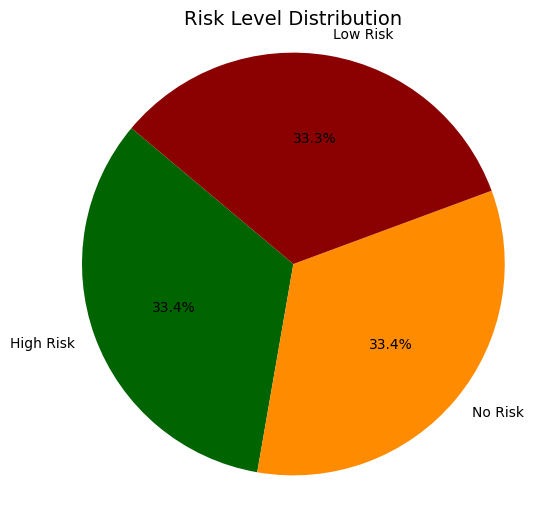

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\checkdataset_2video_classified_balanceddataset.xlsx")

# Count the number of entries for each class in 'risk_level'
class_counts = df['risk_level'].value_counts()

# Print the counts
print("Class Counts:")
print(class_counts)

# Define dark color palette
dark_colors = ['#006400',  # dark green - no risk
               '#ff8c00',  # dark orange - low risk
               '#8b0000']  # dark red - high risk

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=dark_colors)
plt.title('Risk Level Distribution', fontsize=14)
plt.axis('equal')  # Equal aspect ratio makes the pie chart a circle
plt.show()
